<a href="https://colab.research.google.com/github/Bere91/oto-o-22-Tarea-3/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "nu_mfunction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 1s 3m

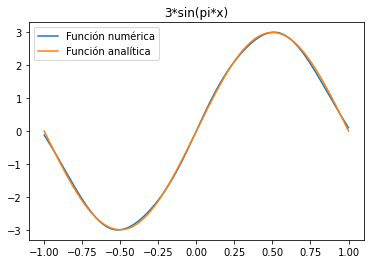

ValueError: ignored

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import math
from matplotlib import pyplot as plt
import numpy as np
class NUMfunction(Sequential):
  def __init__(self, **kwargs):
     super().__init__(**kwargs)
     self.loss_trackers = keras.metrics.Mean(name='loss')
  
  @property
  def metrics(self):
    return [self.loss_trackers]
  
  def train_step(self, data):
     batch_size = tf.shape(data)[0]
     x = tf.random.uniform((batch_size, 1), minval=-1, maxval=1)
     
     with tf.GradientTape() as tape:
       y_pred = self(x, training=True)
       eq = y_pred - 3*tf.math.sin(np.pi*x) 
       
       loss = keras.losses.mean_squared_error(0., eq) 
       '''Apply grads'''
       grads = tape.gradient(loss, self.trainable_variables)
       self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
       
       '''Update metrics'''
       self.loss_trackers.update_state(loss)
       '''Return a dict mapping metric names to current value'''
       return {"loss": self.loss_trackers.result()}

model = NUMfunction()

model.add(Dense(10, activation = 'tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()
model.compile(optimizer=RMSprop(), metrics=['loss'])

x=tf.linspace(-1, 1, 200)
history = model.fit(x, epochs=500, verbose=1)



x_testv = tf.linspace(-1, 1, 200)
a = model.predict(x_testv)
plt.plot(x_testv, a, label='Función numérica')

#Expresión analítica para la solución
plt.plot(x_testv, 3*np.sin(np.pi*x), label = 'Función analítica')
plt.legend(loc = 'upper left')
plt.title('3*sin(pi*x)')
plt.show()

'''Para guardar el modelo en disco'''
model.save("red.h5")
exit()

'''Para cargar la red'''
modelo_cargado = tf.keras.models.load_model('red.h5')